In [68]:
import sys

sys.path.append("../libs")


CONFIG = {
    "dataset_version": 1,
    "feature_dataset_database_file": "../data/feature_store.db",
    "features_to_remove": [
        "id", "loan_amnt", "hardship_flag", "initial_list_status", "issue_d", "default"
        ],
    "baseline_params": {
        "iterations": 1000,
        "auto_class_weights": "Balanced",
        "eval_metric": "PRAUC:use_weights=false",
        "cat_features": [
            "emp_length",
            "home_ownership",
            "verification_status",
            "purpose",
            "addr_state",
            "application_type",
        ],
        "verbose": True,
        "random_seed": 42,
        "max_depth": 8,
        "colsample_bylevel": 0.8,
        "subsample": 0.7,
        "learning_rate": 0.02,
        "early_stopping_rounds": 100,
    }
}

In [69]:
from feature_dataset import FeatureDataset
import pandas as pd

fs = FeatureDataset(CONFIG['feature_dataset_database_file'])

df_training: pd.DataFrame = fs.get_feature_dataset(name="training", version=1)

In [70]:
import numpy as np
df_validation, df_testing = np.split(df_training.sort_values(by='id'), [int(.80 *len(df_training))])

/Users/marcos.mota/projects/personal/lending_club/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
df_training = df_training.drop(columns=CONFIG['features_to_remove'])
df_validation = df_validation.drop(columns=CONFIG['features_to_remove'])
df_testing = df_testing.drop(columns=CONFIG['features_to_remove'])

In [72]:
df_training[CONFIG['baseline_params']['cat_features']] = df_training[CONFIG['baseline_params']['cat_features']].astype(str).fillna('missing')
df_validation[CONFIG['baseline_params']['cat_features']] = df_validation[CONFIG['baseline_params']['cat_features']].astype(str).fillna('missing')
df_testing[CONFIG['baseline_params']['cat_features']] = df_testing[CONFIG['baseline_params']['cat_features']].astype(str).fillna('missing')

In [73]:
X_train = df_training.drop(columns=["target"])
y_train = df_training["target"]

X_val = df_validation.drop(columns=["target"])
y_val = df_validation["target"]

In [74]:
df_training.head()

,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,time_of_banking_days,time_of_banking_months,target
0,7500,36,255.375,< 1 year,OWN,22000.0,Not Verified,debt_consolidation,MA,14.289062,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,1339,44,0.0
1,5000,36,164.250,< 1 year,OWN,80000.0,Not Verified,credit_card,WI,1.209961,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4017,132,0.0
2,3000,36,95.000,< 1 year,MORTGAGE,25000.0,Not Verified,small_business,MA,14.539062,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,2494,82,0.0
3,5000,36,155.375,8 years,MORTGAGE,120000.0,Not Verified,debt_consolidation,MA,2.289062,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,3560,117,0.0
4,5000,36,156.875,< 1 year,MORTGAGE,180000.0,Not Verified,home_improvement,WI,5.550781,...,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4047,133,0.0


In [75]:
X_train

,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,time_of_banking_days,time_of_banking_months
0,7500,36,255.375,< 1 year,OWN,22000.0,Not Verified,debt_consolidation,MA,14.289062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,1339,44
1,5000,36,164.250,< 1 year,OWN,80000.0,Not Verified,credit_card,WI,1.209961,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4017,132
2,3000,36,95.000,< 1 year,MORTGAGE,25000.0,Not Verified,small_business,MA,14.539062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,2494,82
3,5000,36,155.375,8 years,MORTGAGE,120000.0,Not Verified,debt_consolidation,MA,2.289062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,3560,117
4,5000,36,156.875,< 1 year,MORTGAGE,180000.0,Not Verified,home_improvement,WI,5.550781,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4047,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823490,7200,36,234.500,10+ years,MORTGAGE,65000.0,Not Verified,home_improvement,MI,10.359375,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,6362,209
823491,12000,36,418.500,10+ years,OWN,70000.0,Verified,debt_consolidation,IL,20.953125,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,17836,586
823492,11725,36,383.750,8 years,MORTGAGE,36200.0,Not Verified,home_improvement,MO,24.015625,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,3167,104
823493,12000,60,263.750,< 1 year,RENT,100000.0,Not Verified,credit_card,NJ,17.703125,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4078,134


In [76]:
from catboost import CatBoostClassifier

baseline_params = CONFIG['baseline_params']
model = CatBoostClassifier(**baseline_params)

print('Traning the model...')
model.fit(X_train, y_train, eval_set=(X_val, y_val))

print('Evaluating the model...')
y_pred_baseline = model.predict_proba(X_val)[:, 1]

Traning the model...
0:	learn: 0.6595885	test: 0.6306054	best: 0.6306054 (0)	total: 725ms	remaining: 12m 4s
1:	learn: 0.6602236	test: 0.6312232	best: 0.6312232 (1)	total: 1.17s	remaining: 9m 42s
2:	learn: 0.6786480	test: 0.6489159	best: 0.6489159 (2)	total: 1.62s	remaining: 8m 58s
3:	learn: 0.6793267	test: 0.6493529	best: 0.6493529 (3)	total: 2.08s	remaining: 8m 39s
4:	learn: 0.6785411	test: 0.6484853	best: 0.6493529 (3)	total: 2.44s	remaining: 8m 5s
5:	learn: 0.6810894	test: 0.6516936	best: 0.6516936 (5)	total: 2.89s	remaining: 7m 59s
6:	learn: 0.6814037	test: 0.6519146	best: 0.6519146 (6)	total: 3.2s	remaining: 7m 33s
7:	learn: 0.6818147	test: 0.6522024	best: 0.6522024 (7)	total: 3.62s	remaining: 7m 28s
8:	learn: 0.6823602	test: 0.6525990	best: 0.6525990 (8)	total: 3.97s	remaining: 7m 17s
9:	learn: 0.6869598	test: 0.6571561	best: 0.6571561 (9)	total: 4.22s	remaining: 6m 57s
10:	learn: 0.6917250	test: 0.6623771	best: 0.6623771 (10)	total: 4.47s	remaining: 6m 41s
11:	learn: 0.6916652	t

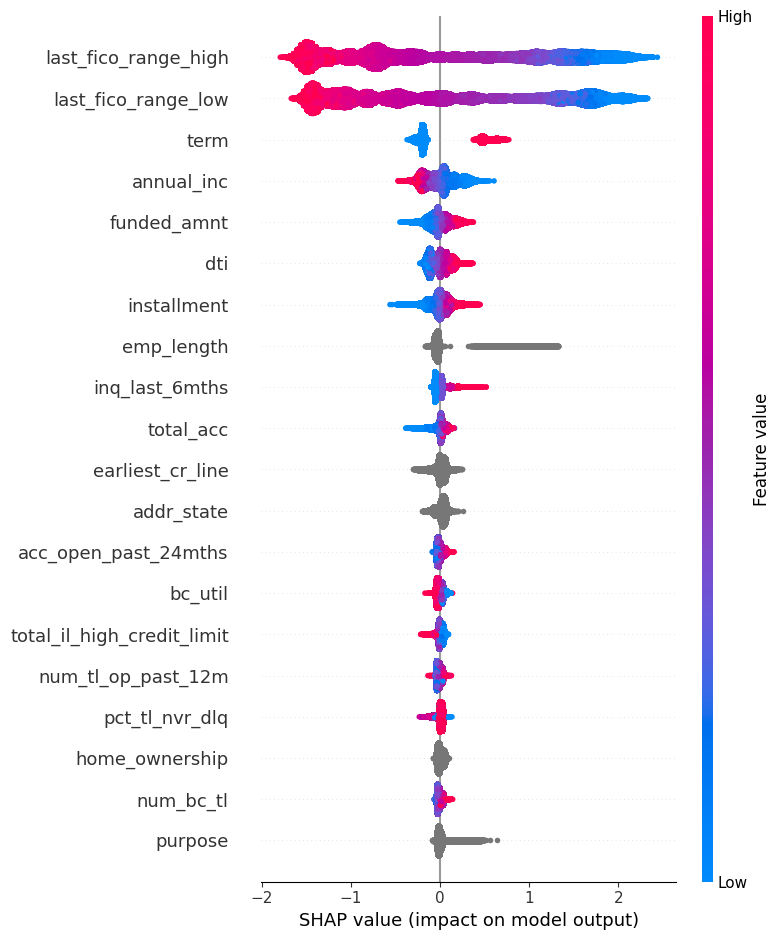

In [77]:
import optuna
import arfs.feature_selection.allrelevant as arfsgroot
import shap

shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(X_val)
shap.summary_plot(shap_values, X_val)

In [78]:
import json, joblib

baseline_features_list_path = '../data/model/baseline_features_list.json'

baseline_features = list(X_train.columns)
with open(baseline_features_list_path, 'w') as f:
    json.dump(baseline_features, f)


model_selected_path = '../data/model/model_baseline.joblib'
joblib.dump(model, model_selected_path)

# Save the model trained with selected features
print(f"Baseline model saved to: {model_selected_path}")
print(f"Baseline model saved to: {baseline_features_list_path}")

Baseline model saved to: ../data/model/model_baseline.joblib
Baseline model saved to: ../data/model/baseline_features_list.json


In [79]:
selected_features = None

In [80]:
X_train

,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,time_of_banking_days,time_of_banking_months
0,7500,36,255.375,< 1 year,OWN,22000.0,Not Verified,debt_consolidation,MA,14.289062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,1339,44
1,5000,36,164.250,< 1 year,OWN,80000.0,Not Verified,credit_card,WI,1.209961,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4017,132
2,3000,36,95.000,< 1 year,MORTGAGE,25000.0,Not Verified,small_business,MA,14.539062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,2494,82
3,5000,36,155.375,8 years,MORTGAGE,120000.0,Not Verified,debt_consolidation,MA,2.289062,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,3560,117
4,5000,36,156.875,< 1 year,MORTGAGE,180000.0,Not Verified,home_improvement,WI,5.550781,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4047,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823490,7200,36,234.500,10+ years,MORTGAGE,65000.0,Not Verified,home_improvement,MI,10.359375,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,6362,209
823491,12000,36,418.500,10+ years,OWN,70000.0,Verified,debt_consolidation,IL,20.953125,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,17836,586
823492,11725,36,383.750,8 years,MORTGAGE,36200.0,Not Verified,home_improvement,MO,24.015625,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,3167,104
823493,12000,60,263.750,< 1 year,RENT,100000.0,Not Verified,credit_card,NJ,17.703125,...,-1,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,4078,134


In [81]:
from evaluation.evaluation import *

In [82]:
clf_metric_report(y_pred_baseline, y_val)


Evaluating the model...
ROC AUC: 0.9215780157194013
Brier Score: 0.11867670312673119
Average Precision: 0.7013481804345292
Log Loss: 0.36249675127820097


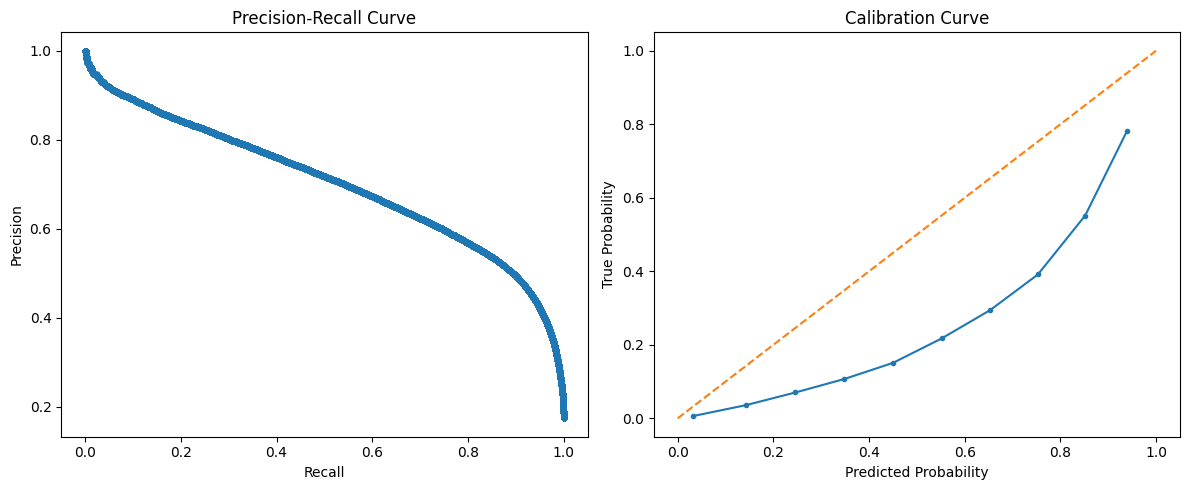

In [83]:
plot_pr_calib_curve(y_pred_baseline, y_val)


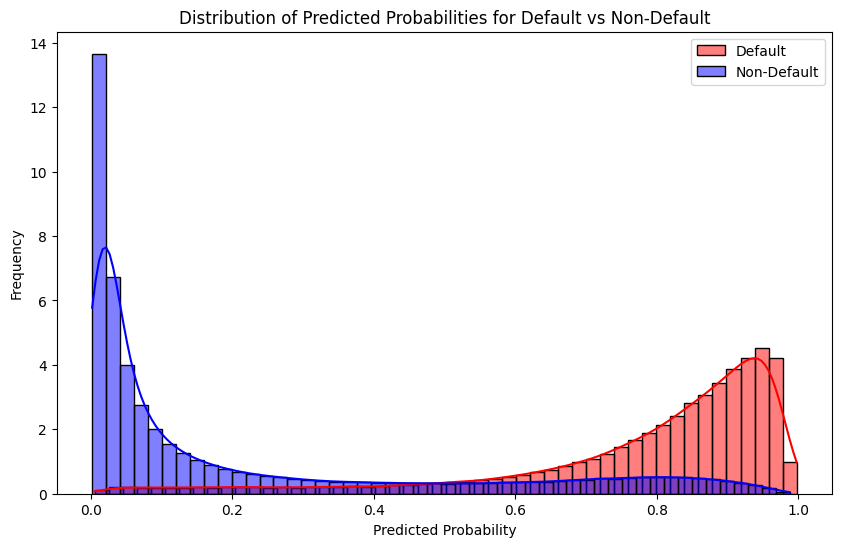

In [84]:
plot_dis_probs(y_pred_baseline, y_val)


In [85]:
print('Baseline model')
clf_metric_report(y_pred_baseline, y_val)

Baseline model
Evaluating the model...
ROC AUC: 0.9215780157194013
Brier Score: 0.11867670312673119
Average Precision: 0.7013481804345292
Log Loss: 0.36249675127820097
